In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
plt.style.use ("dark_background")
import pickle
import pyttsx3

In [2]:
data = pd.read_csv('datacancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13888\1272694535.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data['diagnosis'],kde=True,palette='hot')


<Axes: xlabel='diagnosis', ylabel='Count'>

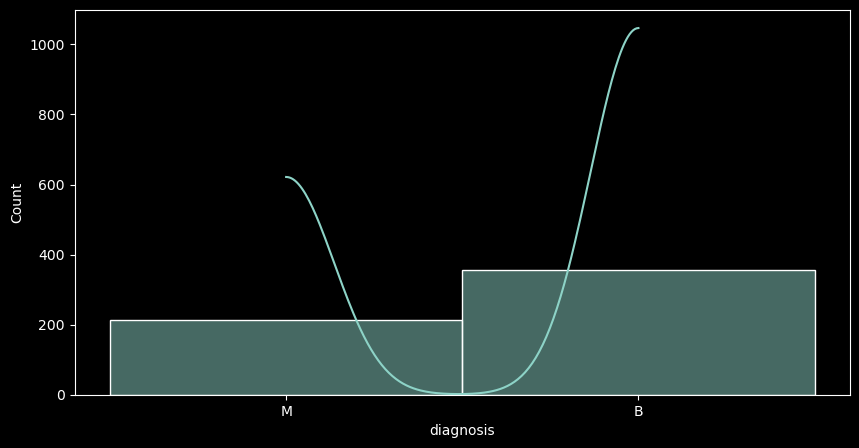

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(data=data['diagnosis'],kde=True,palette='hot')

# checking for missing values

In [5]:
nan = data.isna()
nan.sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

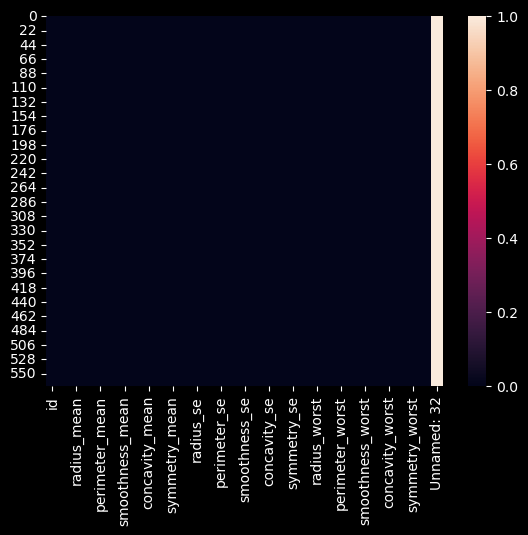

In [6]:
sns.heatmap(nan)

# making data cleaning

In [7]:
data = data.drop('Unnamed: 32',1) # 1 represent column bases, 0 represent row based
data.head()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13888\1361128771.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Unnamed: 32',1) # 1 represent column bases, 0 represent row based


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
nan = data.isna()
nan.sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

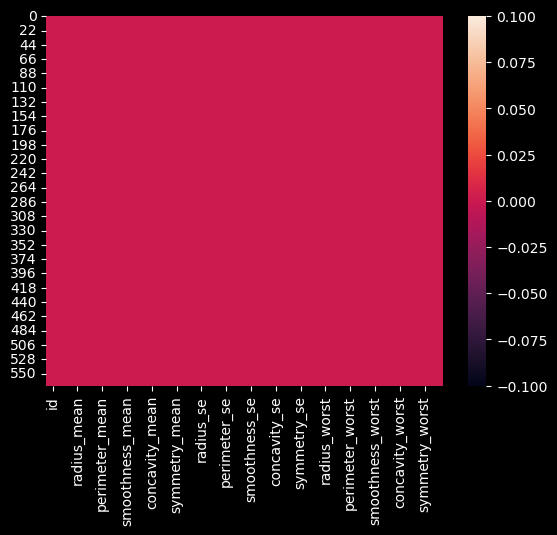

In [9]:
sns.heatmap(nan)

In [10]:
des = data.describe()
des

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
diagnosis = LabelEncoder()
data['diagnosis'] = diagnosis.fit_transform(data['diagnosis'])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

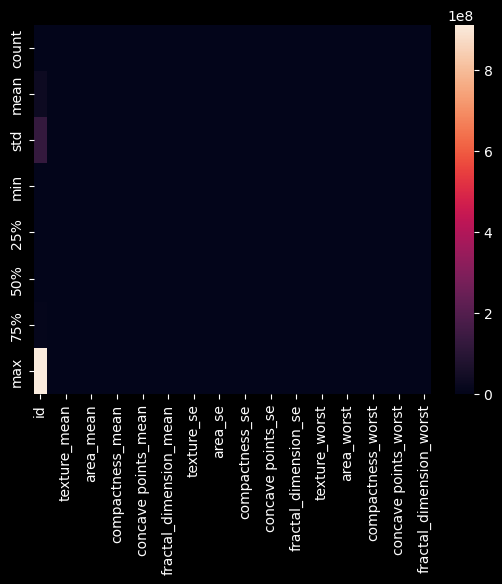

In [12]:
sns.heatmap(des)

In [13]:
#sns.pairplot(des)

In [14]:
corr = data.corr()
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

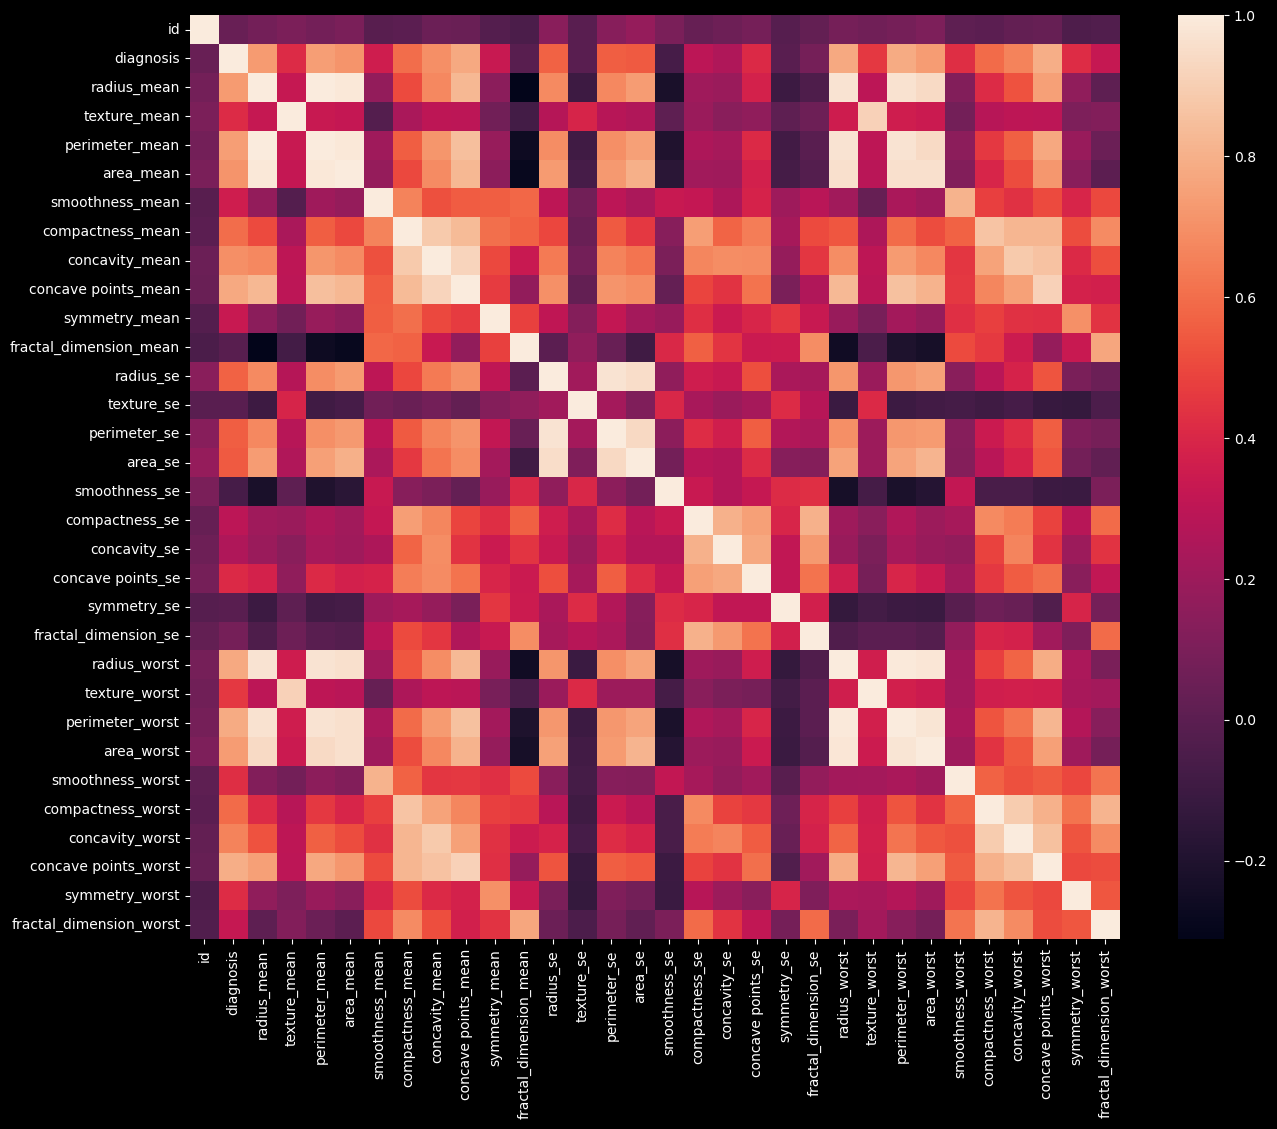

In [15]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr)

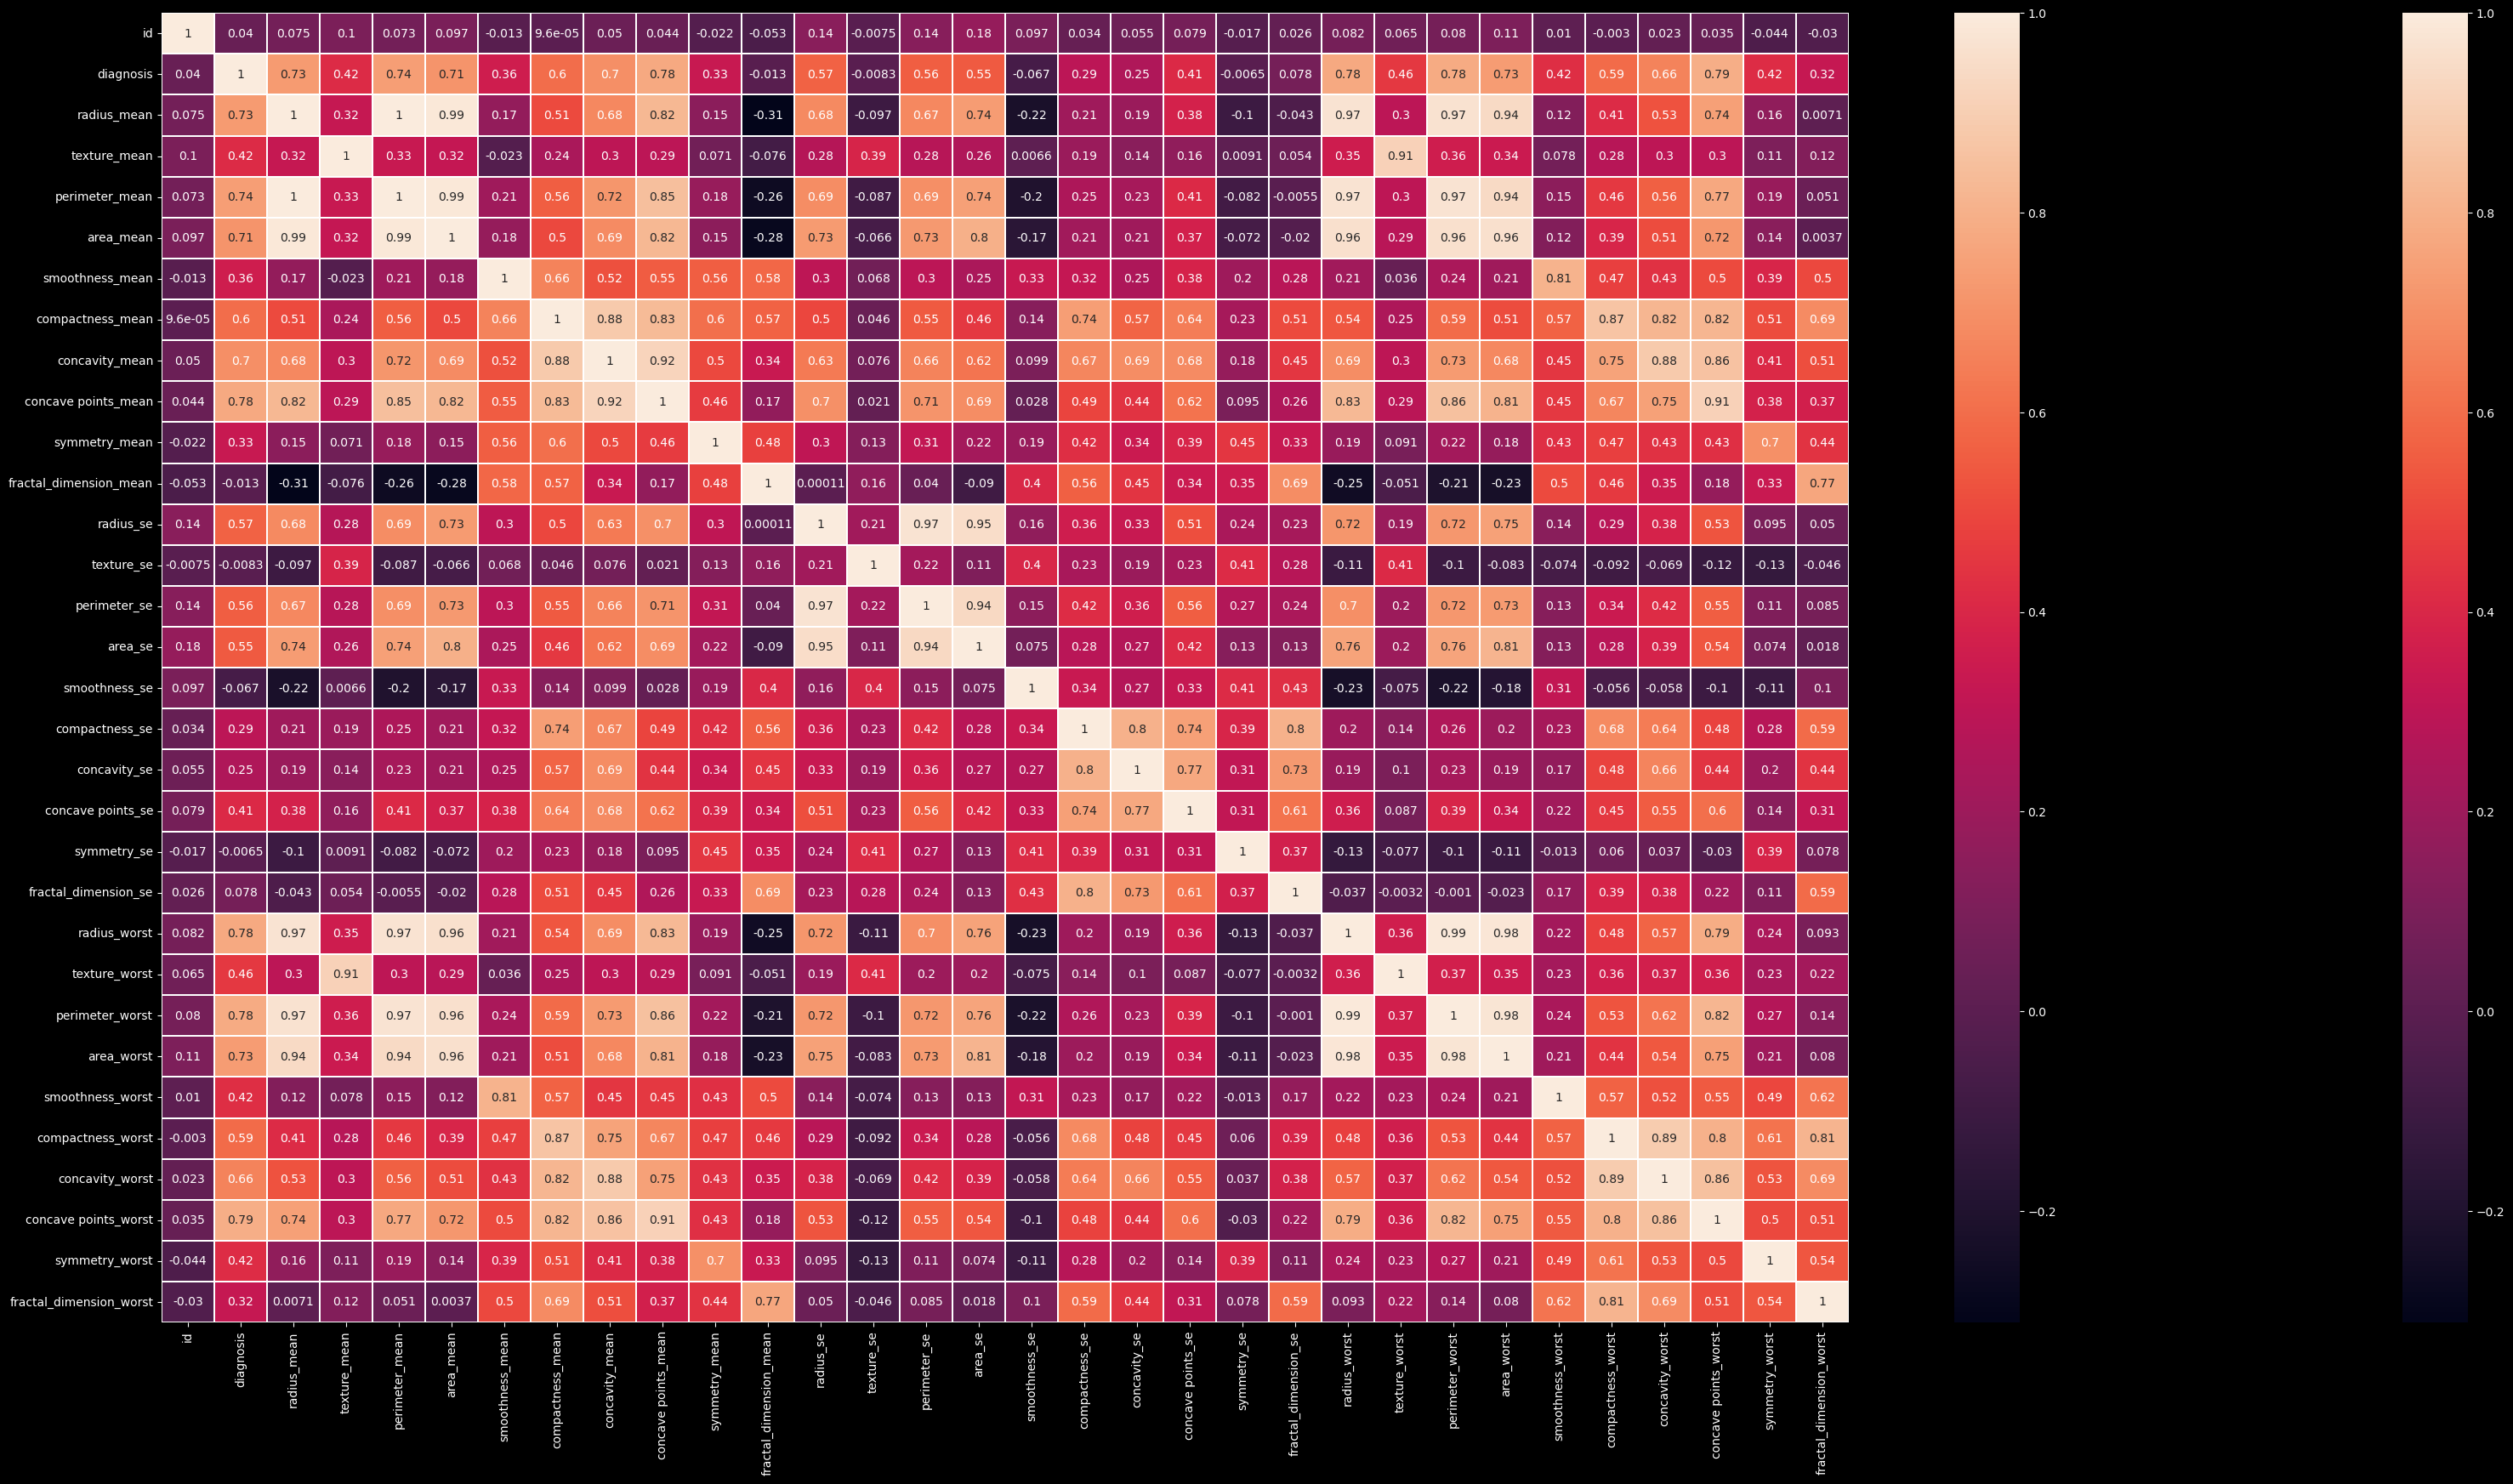

In [16]:
plt.figure(figsize=(40, 20))
sns.heatmap(data.corr())
top_corr_features = data.corr().index
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidth=.10,cmap="rocket")

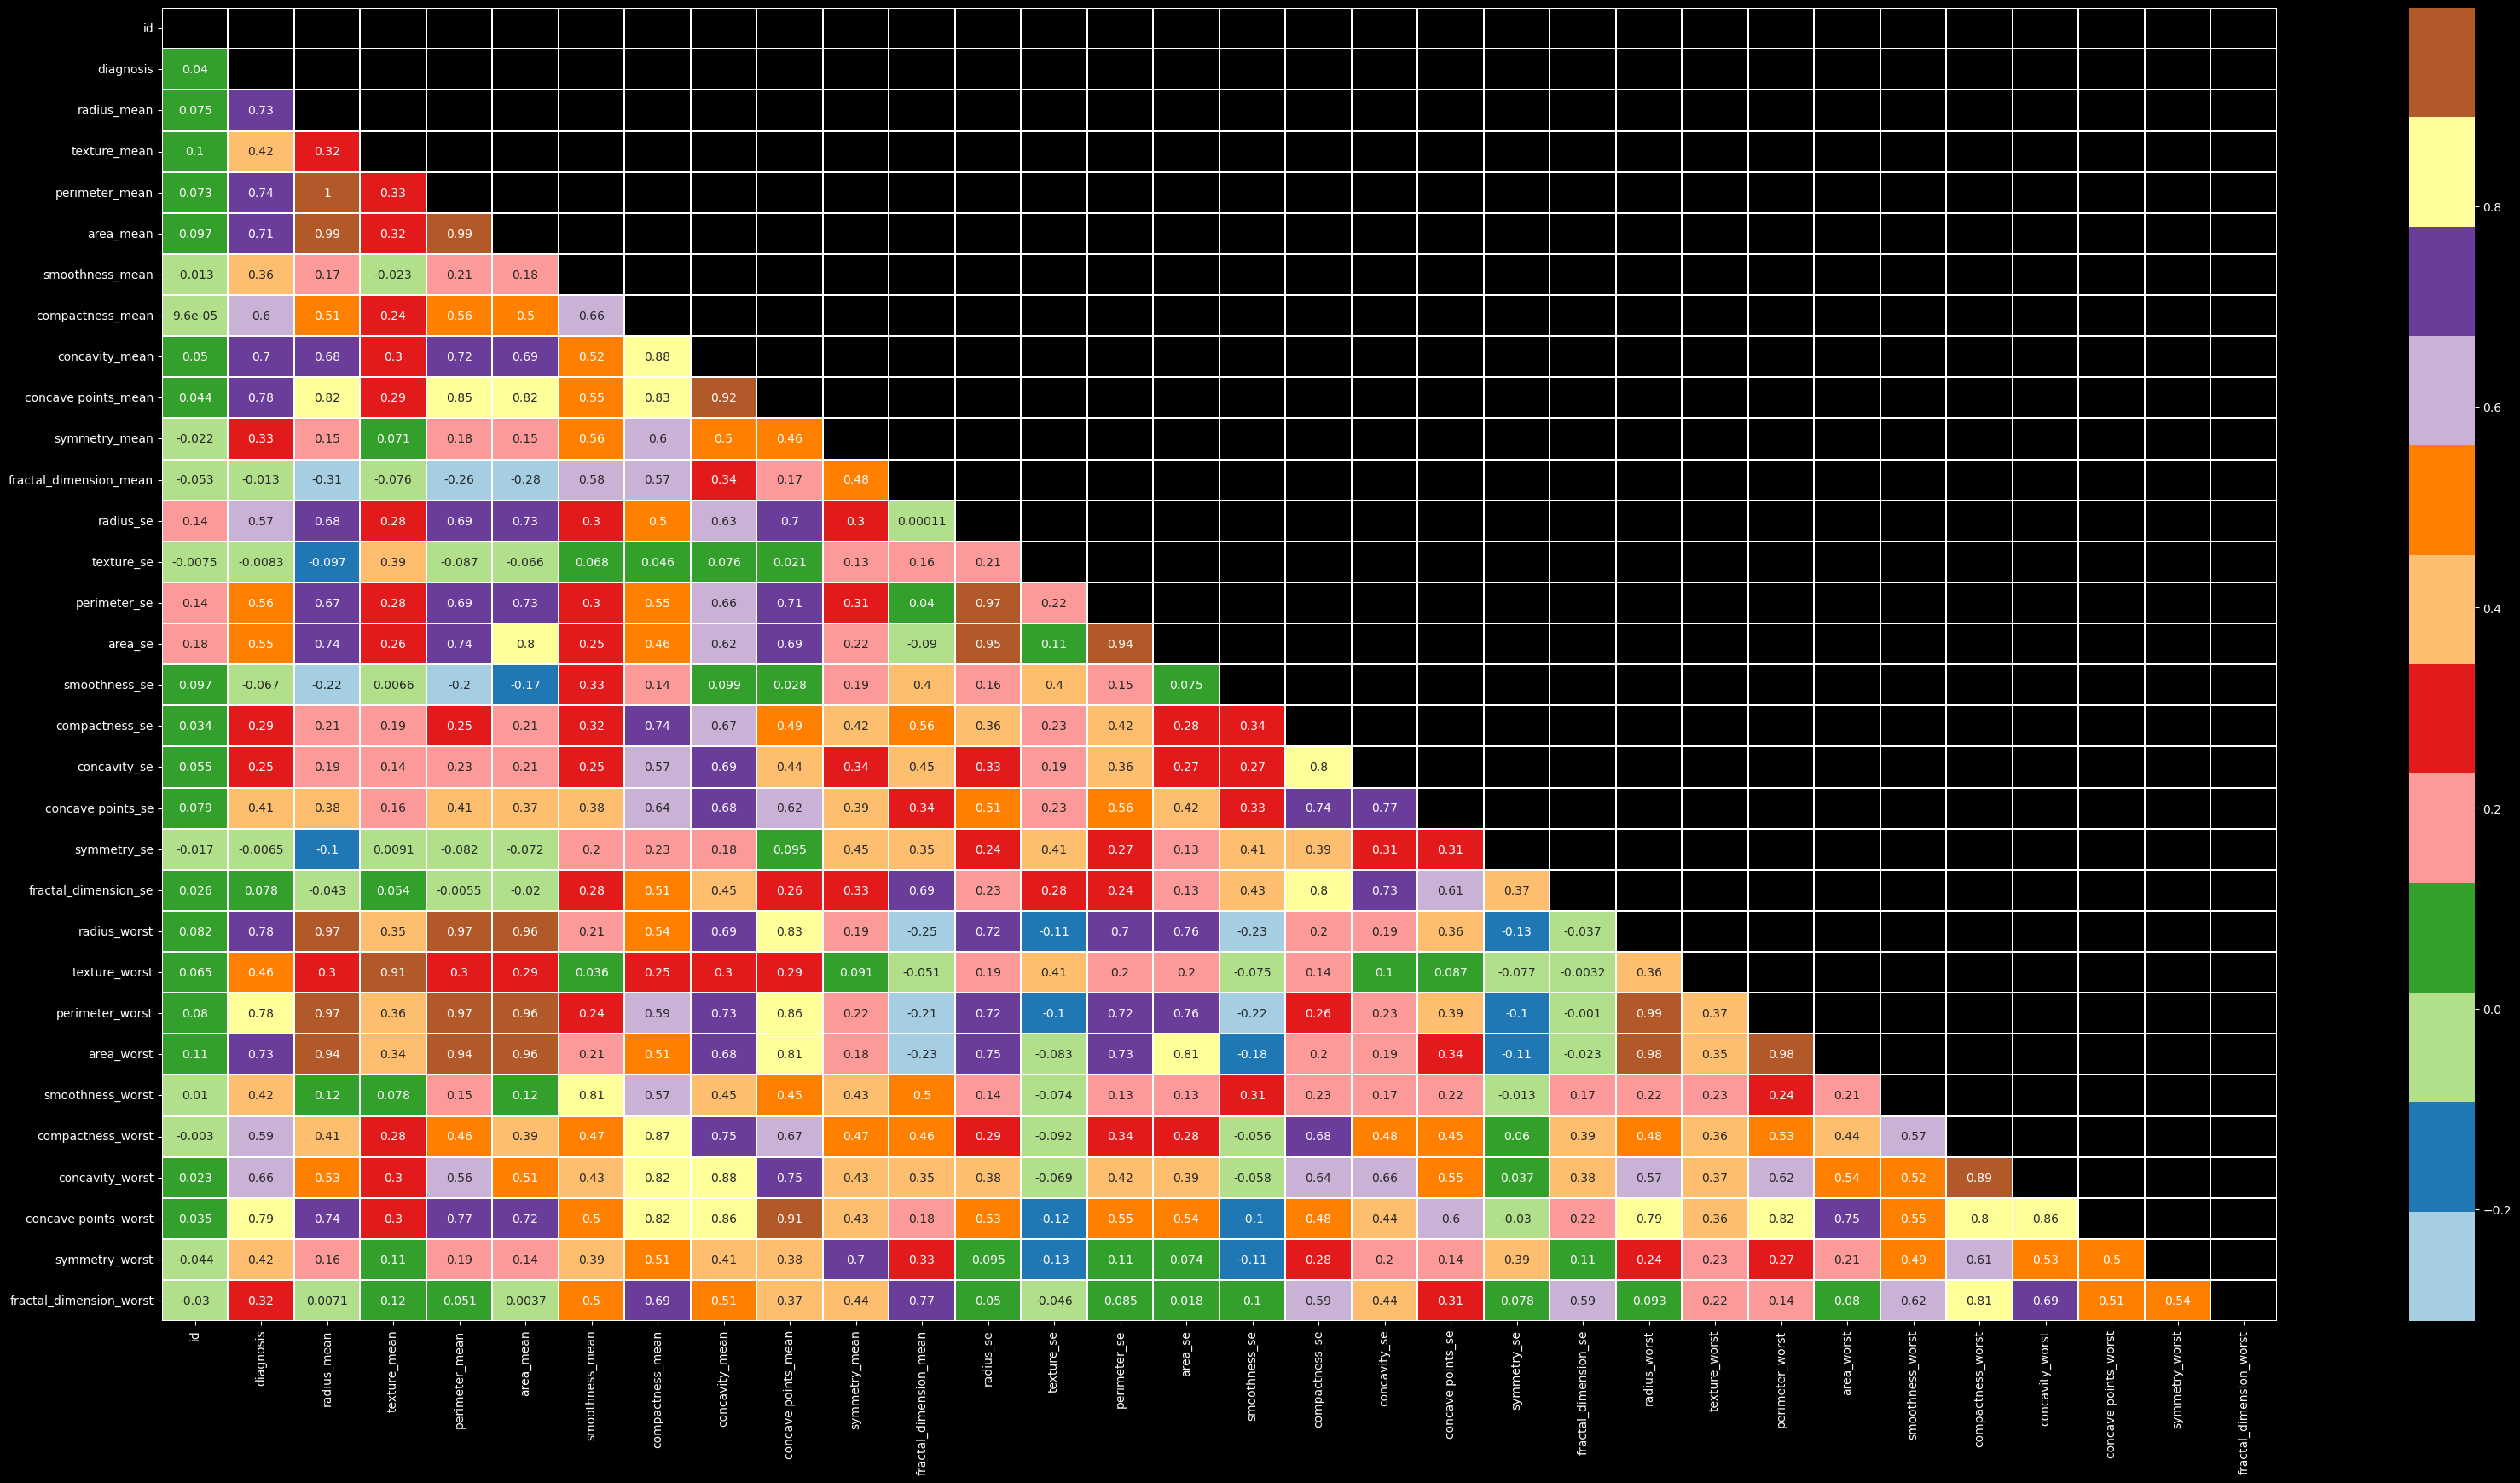

In [17]:
plt.figure(figsize=(40, 20))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");

<Axes: ylabel='Count'>

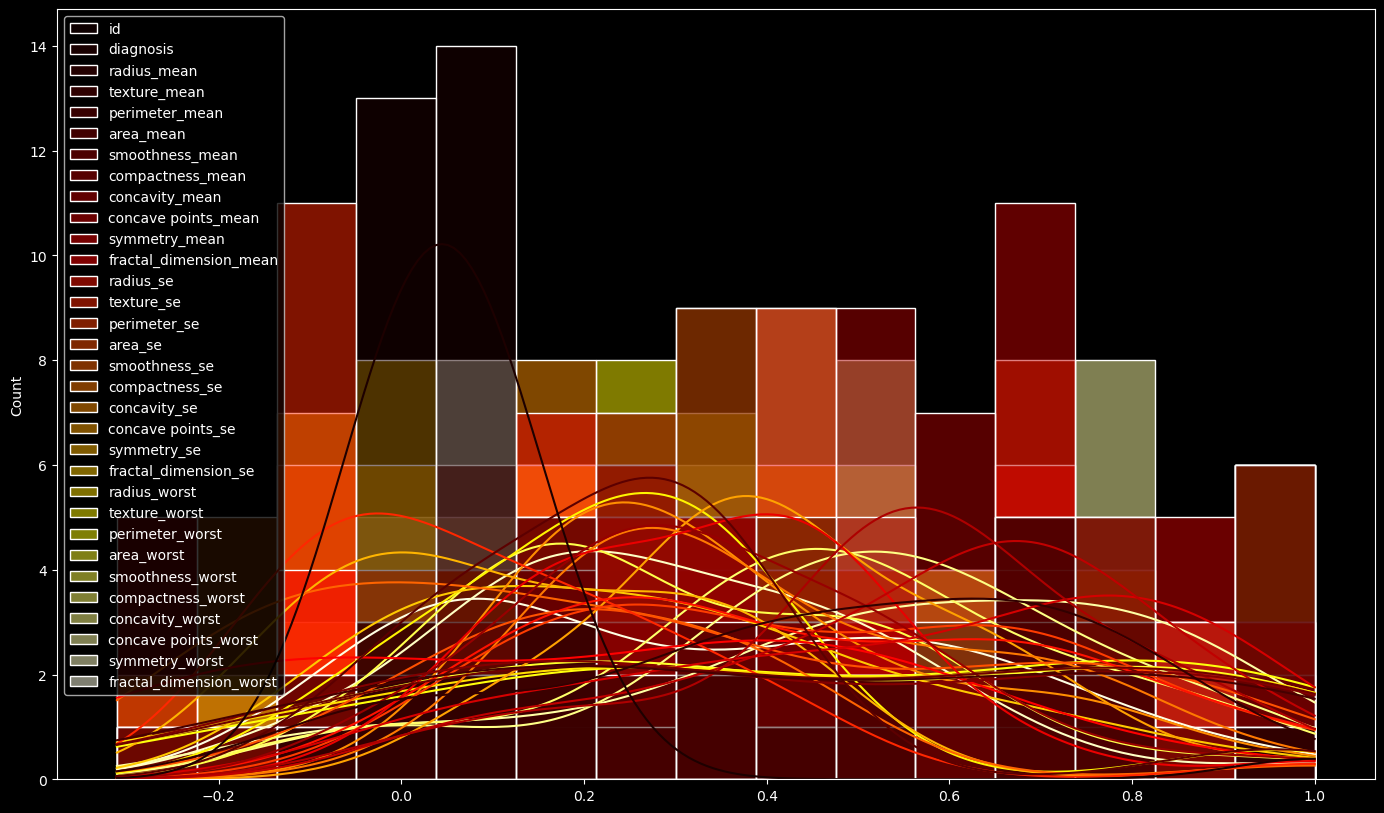

In [18]:
plt.figure(figsize=(17, 10))
sns.histplot(data=corr,kde=True,palette='hot')

In [19]:
n_unique = data.nunique()
n_unique

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [20]:
unique = pd.DataFrame(data.nunique())

<Axes: >

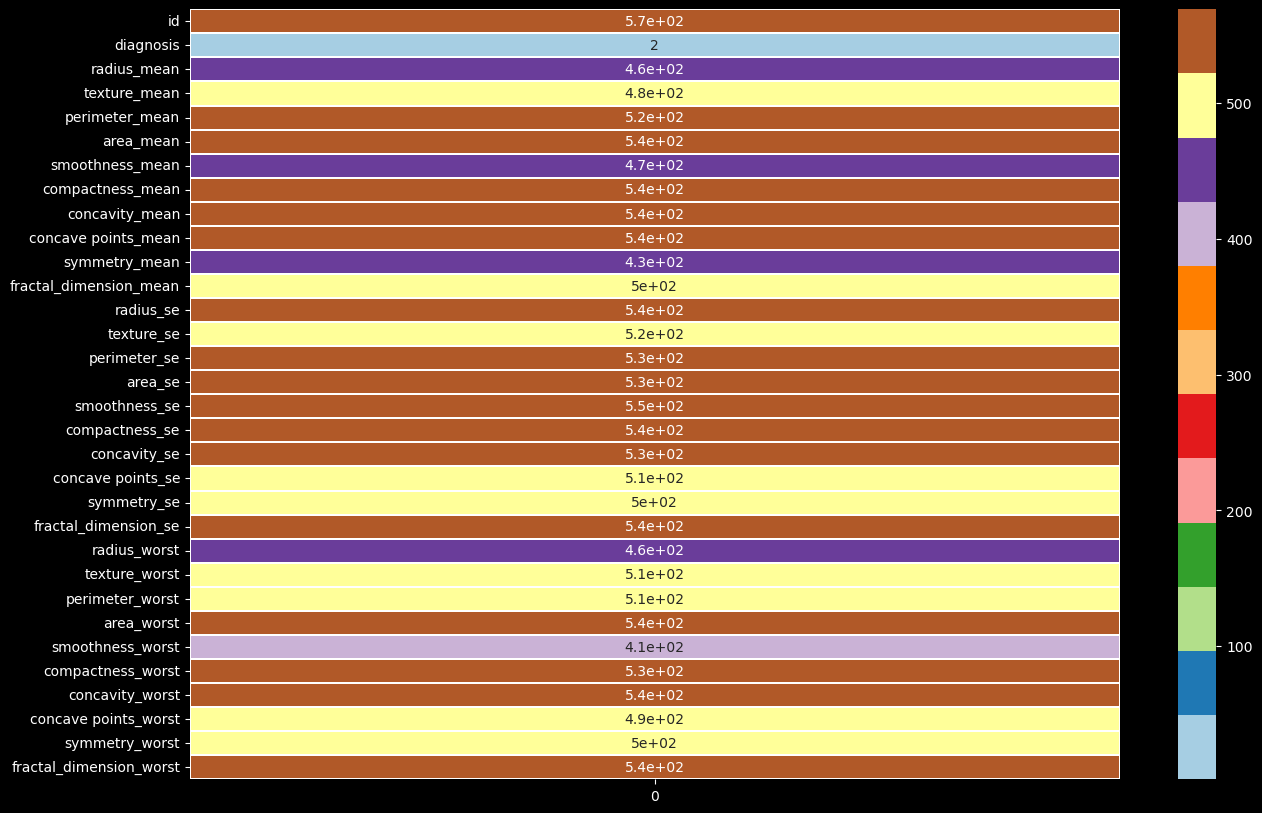

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(unique,annot=True, linewidth=.10, cmap="Paired")

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13888\4276429882.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=n_unique,kde=True,palette='hot')


<Axes: ylabel='Count'>

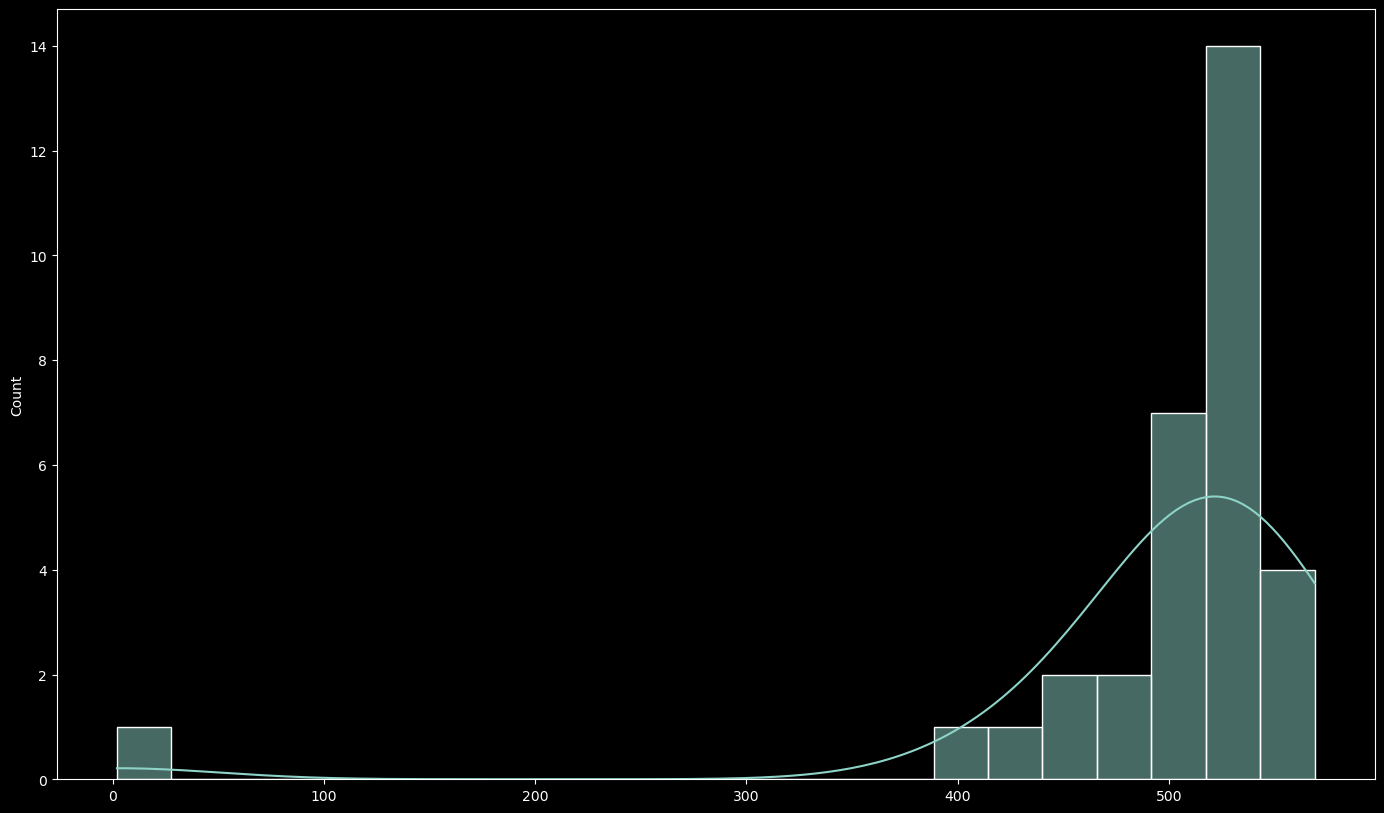

In [22]:
plt.figure(figsize=(17, 10))
sns.histplot(data=n_unique,kde=True,palette='hot')

<Axes: ylabel='count'>

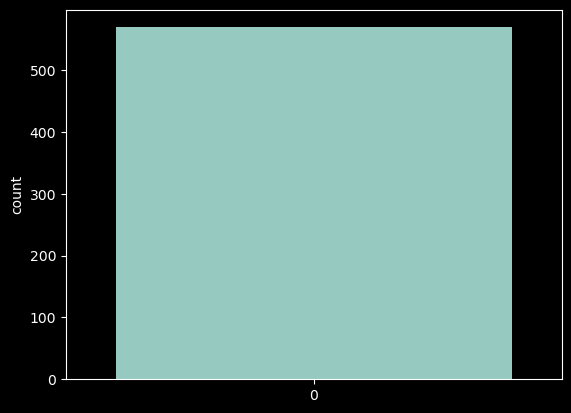

In [23]:
sns.countplot (data['diagnosis'])

<Axes: >

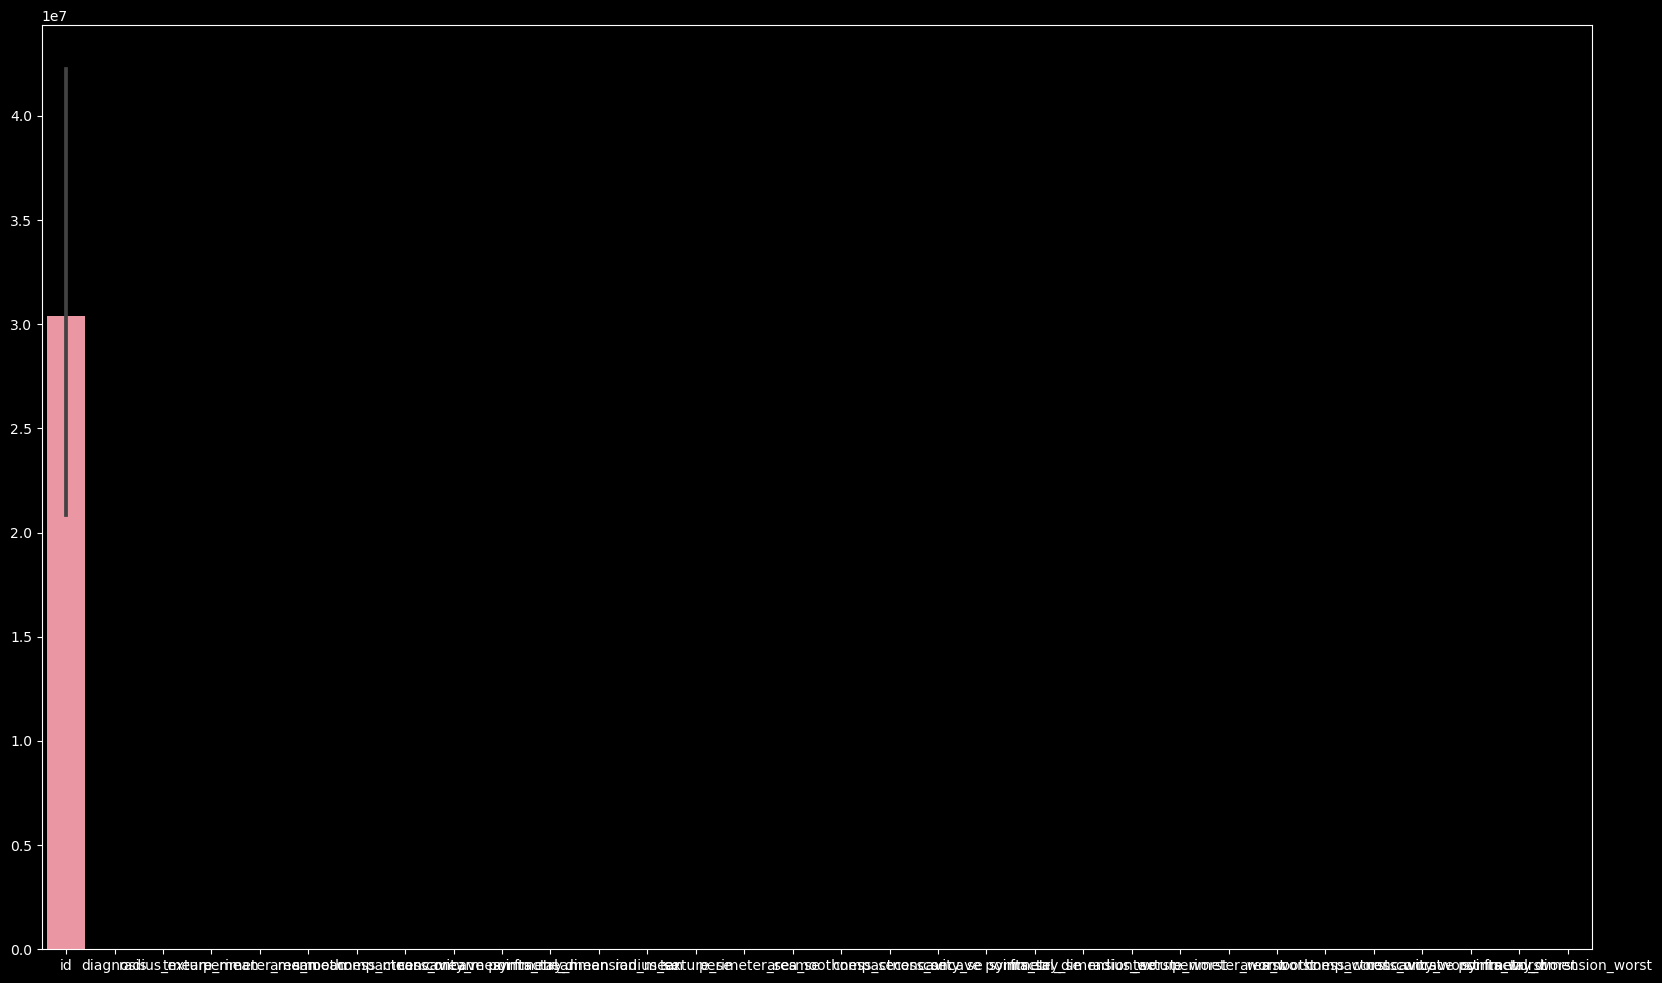

In [24]:
plt.figure(figsize=(20, 12))
sns.barplot(data=data)

In [25]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# splitting data for train and test data

In [26]:
y = data.iloc[:,1].values   #lables
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [27]:
x = data.drop('diagnosis',1) # 1 represent column bases, 0 represent row based
x

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13888\1309358316.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('diagnosis',1) # 1 represent column bases, 0 represent row based


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
x = np.array(x)
x

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

# scaling for data to convert it to standrization data

In [29]:
SC = StandardScaler()
x[:,0:5] = SC.fit_transform(x[:,0:5])
x[:,10:14] = SC.fit_transform(x[:,10:14])
x

array([[-0.23640517,  1.09706398, -2.07333501, ...,  0.2654    ,
         0.4601    ,  0.1189    ],
       [-0.23640344,  1.82982061, -0.35363241, ...,  0.186     ,
         0.275     ,  0.08902   ],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  0.243     ,
         0.3613    ,  0.08758   ],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.1418    ,
         0.2218    ,  0.0782    ],
       [-0.23572517,  1.83834103,  2.33645719, ...,  0.265     ,
         0.4087    ,  0.124     ],
       [-0.24240586, -1.80840125,  1.22179204, ...,  0.        ,
         0.2871    ,  0.07039   ]])

In [30]:
df_x = pd.DataFrame(x,columns = ['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
df_x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-0.235727,0.702284,2.045574,0.672676,0.577953,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-0.235725,1.838341,2.336457,1.982524,1.735218,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
#df_x.to_csv("Inputs.csv")

# apply PCA to reduction dimention

In [32]:
pca = PCA()
x = pca.fit_transform(x)
x

array([[ 1.14590746e+03,  3.84787432e+01, -1.10170827e+01, ...,
        -1.26338335e-03,  2.03048331e-03,  7.30408068e-04],
       [ 1.07654985e+03, -3.49086429e+01,  1.46481426e+01, ...,
        -6.49246449e-04,  6.63723706e-04, -1.06872994e-03],
       [ 8.31414663e+02,  1.77649760e-01,  3.23588069e+00, ...,
         1.53899302e-04, -7.89231894e-04,  3.98767797e-04],
       ...,
       [ 2.44199857e+02, -8.26619681e+00, -6.57718373e+00, ...,
        -1.05120438e-03,  5.22925802e-04, -2.67925108e-04],
       [ 9.44400644e+02, -1.72824471e+01, -2.37117854e+01, ...,
         3.00043274e-03, -7.57162730e-04,  1.23118885e-03],
       [-6.13839987e+02,  1.92544330e+01,  9.09993500e+00, ...,
        -9.36913622e-04,  9.18581130e-05,  1.40643504e-03]])

<Axes: >

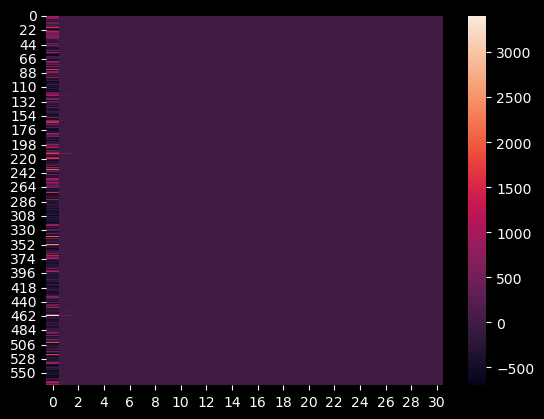

In [33]:
sns.heatmap(x)

In [34]:
x_train,x_test,y_train,y_test = train_test_split ( x , y , test_size = 0.2 , random_state = 0)

In [35]:
x_test

array([[-3.61152964e+01, -5.07009835e+00, -8.53389241e+00, ...,
        -1.38825749e-03,  9.47419792e-04, -4.19563534e-04],
       [-2.49118982e+02, -6.85882138e+00, -2.89483113e-01, ...,
        -5.12546556e-04, -1.04237429e-03,  3.67828191e-04],
       [-1.92973252e+02, -8.44720650e+00,  1.85408510e+00, ...,
         8.05914119e-04, -8.81248379e-05,  2.59662548e-05],
       ...,
       [ 5.99210191e+02, -2.68329388e+01, -1.24291299e+00, ...,
         4.97990311e-04, -1.24258391e-03,  5.17034629e-04],
       [ 6.13901819e+02, -1.26250421e+01,  1.82428022e+00, ...,
         3.77400156e-04, -9.14555643e-04, -5.64595389e-05],
       [-2.38242363e+01, -4.06843808e+00, -2.07683929e+00, ...,
         1.61287361e-04,  2.40414495e-04, -1.06440833e-03]])

In [36]:
DF_x_test = pd.DataFrame(x_test,columns = ['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
DF_x_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-36.115296,-5.070098,-8.533892,1.778058,-1.020411,0.805861,-1.035868,-0.250011,0.061873,-0.100486,...,-0.001965,-0.000313,-0.002812,-0.002514,-0.000152,0.001625,0.000604,-0.001388,0.000947,-0.000420
1,-249.118982,-6.858821,-0.289483,9.576394,1.022816,-0.845438,-0.437257,0.234984,0.073195,0.153559,...,-0.002468,0.002704,-0.001349,0.000902,0.001780,0.002365,0.000506,-0.000513,-0.001042,0.000368
2,-192.973252,-8.447206,1.854085,-5.796019,0.893750,-0.650560,-0.230436,0.086028,-0.049889,0.174691,...,-0.004604,-0.001035,0.001640,0.002930,0.002189,-0.000055,0.001156,0.000806,-0.000088,0.000026
3,-62.018951,-15.926265,-0.619562,-1.058813,0.896758,-0.587849,-0.608655,-0.164241,0.094949,0.001530,...,-0.006683,-0.007602,0.003306,0.003176,-0.003452,-0.000191,0.000607,0.000526,0.000817,-0.000239
4,-336.455259,-4.076227,4.107701,-0.532394,-0.034505,-0.775959,2.086823,0.134423,0.151846,0.504738,...,-0.014548,0.001485,0.003182,-0.009024,-0.002633,0.000361,0.005294,0.002163,-0.003028,-0.000374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,141.847506,8.602310,-6.120691,0.929748,4.385890,4.798695,2.339369,0.930872,-0.301128,0.341584,...,0.011241,-0.009668,-0.010793,-0.007268,0.001509,-0.002422,-0.005063,0.011493,0.012073,0.000236
110,-257.082814,4.930515,-0.783727,-3.181135,-0.275940,0.047373,-0.250131,0.170195,0.107050,-0.278423,...,0.012487,0.004719,0.006265,-0.000796,0.004847,-0.000335,-0.001626,-0.000678,0.000534,0.000125
111,599.210191,-26.832939,-1.242913,-4.258873,-0.006314,-0.260483,0.443195,0.790490,0.308053,0.562858,...,0.003184,-0.001554,-0.005597,-0.000748,0.000163,0.004989,0.004069,0.000498,-0.001243,0.000517
112,613.901819,-12.625042,1.824280,-1.819734,0.115481,-0.380087,-0.119646,0.500135,0.182228,-0.038944,...,0.000909,-0.006444,-0.003360,-0.004545,-0.000095,0.005084,-0.002143,0.000377,-0.000915,-0.000056


# applying an algo (Logistic Regression) to make prediction before Normalization

In [37]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred1 = LR.predict(x_test)
print(y_pred1)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0]


C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy = 93.85964912280701 %


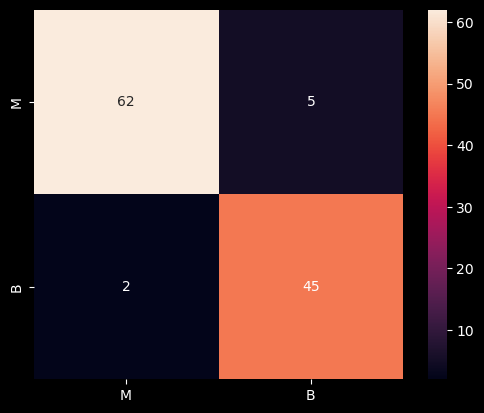

In [38]:
cm = confusion_matrix(y_test, y_pred1)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred1)
print("Model Accuracy =",acc*100,"%")

# applying an algo (SVM) to make prediction before Normalization

In [39]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 94.73684210526315 %


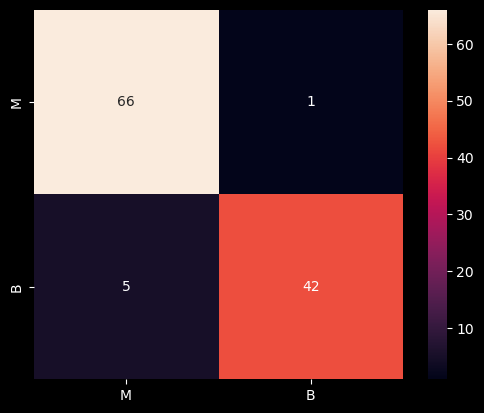

In [40]:
cm = confusion_matrix(y_test, y_pred2)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred2)
print("Model Accuracy =",acc*100,"%")

# applying an algo (DecisionTreeClassifier) to make prediction before Normalization¶

In [41]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred3 = DTC.predict(x_test)
print(y_pred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 1 1 1]


Model Accuracy = 87.71929824561403 %


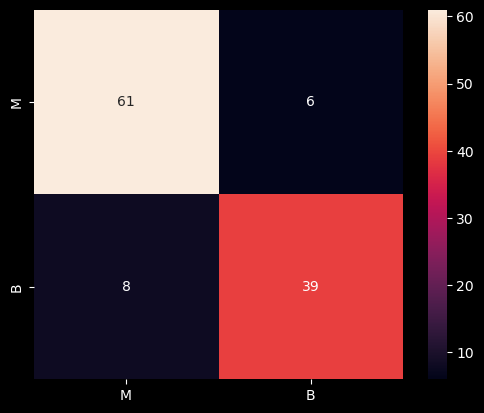

In [42]:
cm = confusion_matrix(y_test, y_pred3)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred3)
print("Model Accuracy =",acc*100,"%")

# applying an algo (Random Forest) to make prediction before Normalization

In [43]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred4 = RFC.predict(x_test)
print(y_pred4)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 96.49122807017544 %


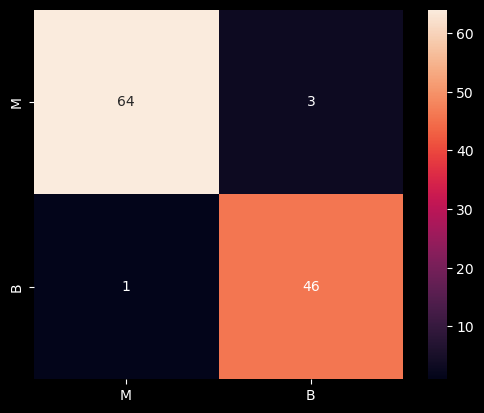

In [44]:
cm = confusion_matrix(y_test, y_pred4)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred4)
print("Model Accuracy =",acc*100,"%")

# applying an algo (KNeighborsClassifier) to make prediction before Normalization

In [45]:
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
y_pred5 = KNC.predict(x_test)
print(y_pred5)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 94.73684210526315 %


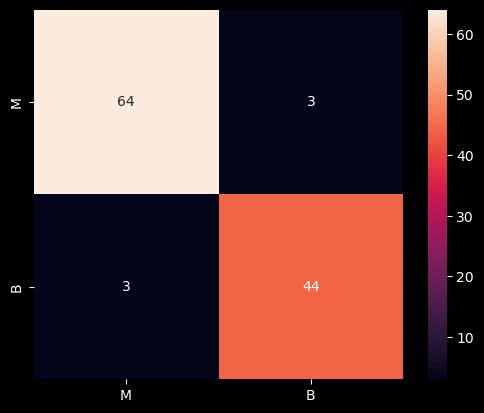

In [46]:
cm = confusion_matrix(y_test, y_pred5)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred5)
print("Model Accuracy =",acc*100,"%")

# applying an algo (XGBoost) to make prediction before Normalization

In [47]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.01,max_depth=3,n_estimators=100,subsample=0.9,colsample_bytree=0.9)
xgb_model.fit(x_train,y_train)
y_pred6 = xgb_model.predict(x_test)
print(y_pred6)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 96.49122807017544 %


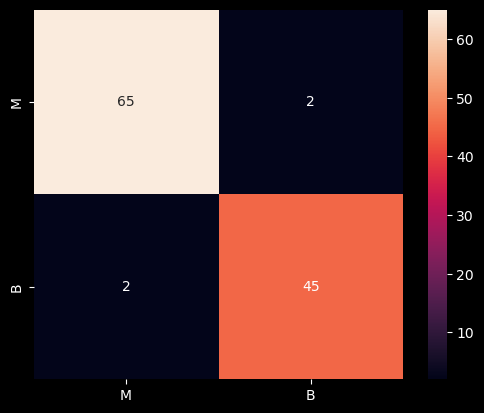

In [48]:
cm = confusion_matrix(y_test, y_pred6)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred6)
print("Model Accuracy =",acc*100,"%")

# applying an algo (CatBoostClassifier) to make prediction before Normalization

In [49]:
CBC = CatBoostClassifier()
CBC.fit(x_train,y_train)
y_pred7 = CBC.predict(x_test)
print(y_pred7)

Learning rate set to 0.00736
0:	learn: 0.6826737	total: 187ms	remaining: 3m 7s
1:	learn: 0.6730854	total: 194ms	remaining: 1m 36s
2:	learn: 0.6639531	total: 199ms	remaining: 1m 6s
3:	learn: 0.6545326	total: 204ms	remaining: 50.8s
4:	learn: 0.6465407	total: 208ms	remaining: 41.5s
5:	learn: 0.6377575	total: 213ms	remaining: 35.3s
6:	learn: 0.6284847	total: 217ms	remaining: 30.8s
7:	learn: 0.6189753	total: 221ms	remaining: 27.4s
8:	learn: 0.6095633	total: 226ms	remaining: 24.8s
9:	learn: 0.6026612	total: 231ms	remaining: 22.8s
10:	learn: 0.5967673	total: 235ms	remaining: 21.2s
11:	learn: 0.5900318	total: 239ms	remaining: 19.7s
12:	learn: 0.5840955	total: 244ms	remaining: 18.5s
13:	learn: 0.5773634	total: 249ms	remaining: 17.5s
14:	learn: 0.5694280	total: 253ms	remaining: 16.6s
15:	learn: 0.5608626	total: 258ms	remaining: 15.9s
16:	learn: 0.5545655	total: 262ms	remaining: 15.2s
17:	learn: 0.5486436	total: 267ms	remaining: 14.6s
18:	learn: 0.5427654	total: 272ms	remaining: 14s
19:	learn: 0.

180:	learn: 0.1388584	total: 996ms	remaining: 4.5s
181:	learn: 0.1381465	total: 1s	remaining: 4.51s
182:	learn: 0.1373154	total: 1.01s	remaining: 4.5s
183:	learn: 0.1365562	total: 1.01s	remaining: 4.5s
184:	learn: 0.1358025	total: 1.02s	remaining: 4.49s
185:	learn: 0.1348420	total: 1.02s	remaining: 4.48s
186:	learn: 0.1342751	total: 1.03s	remaining: 4.47s
187:	learn: 0.1336654	total: 1.03s	remaining: 4.47s
188:	learn: 0.1328528	total: 1.04s	remaining: 4.46s
189:	learn: 0.1321691	total: 1.05s	remaining: 4.47s
190:	learn: 0.1314003	total: 1.05s	remaining: 4.46s
191:	learn: 0.1308794	total: 1.06s	remaining: 4.46s
192:	learn: 0.1302643	total: 1.06s	remaining: 4.45s
193:	learn: 0.1296123	total: 1.07s	remaining: 4.44s
194:	learn: 0.1289153	total: 1.07s	remaining: 4.43s
195:	learn: 0.1281286	total: 1.08s	remaining: 4.43s
196:	learn: 0.1273193	total: 1.08s	remaining: 4.42s
197:	learn: 0.1265904	total: 1.09s	remaining: 4.41s
198:	learn: 0.1258513	total: 1.09s	remaining: 4.41s
199:	learn: 0.1253

368:	learn: 0.0664263	total: 1.98s	remaining: 3.39s
369:	learn: 0.0662473	total: 1.99s	remaining: 3.39s
370:	learn: 0.0661311	total: 2s	remaining: 3.38s
371:	learn: 0.0659679	total: 2s	remaining: 3.38s
372:	learn: 0.0657852	total: 2.01s	remaining: 3.38s
373:	learn: 0.0656455	total: 2.01s	remaining: 3.37s
374:	learn: 0.0654632	total: 2.02s	remaining: 3.37s
375:	learn: 0.0652626	total: 2.03s	remaining: 3.36s
376:	learn: 0.0651398	total: 2.03s	remaining: 3.36s
377:	learn: 0.0650085	total: 2.04s	remaining: 3.35s
378:	learn: 0.0647983	total: 2.04s	remaining: 3.35s
379:	learn: 0.0646512	total: 2.05s	remaining: 3.34s
380:	learn: 0.0645792	total: 2.05s	remaining: 3.33s
381:	learn: 0.0643686	total: 2.06s	remaining: 3.33s
382:	learn: 0.0642350	total: 2.06s	remaining: 3.32s
383:	learn: 0.0640037	total: 2.06s	remaining: 3.31s
384:	learn: 0.0638590	total: 2.07s	remaining: 3.31s
385:	learn: 0.0636670	total: 2.08s	remaining: 3.3s
386:	learn: 0.0634533	total: 2.08s	remaining: 3.3s
387:	learn: 0.063215

563:	learn: 0.0396701	total: 3.01s	remaining: 2.33s
564:	learn: 0.0395804	total: 3.01s	remaining: 2.32s
565:	learn: 0.0395197	total: 3.02s	remaining: 2.31s
566:	learn: 0.0394159	total: 3.02s	remaining: 2.31s
567:	learn: 0.0393097	total: 3.03s	remaining: 2.31s
568:	learn: 0.0392232	total: 3.04s	remaining: 2.3s
569:	learn: 0.0391020	total: 3.04s	remaining: 2.29s
570:	learn: 0.0390046	total: 3.06s	remaining: 2.3s
571:	learn: 0.0389081	total: 3.07s	remaining: 2.29s
572:	learn: 0.0388317	total: 3.07s	remaining: 2.29s
573:	learn: 0.0386862	total: 3.08s	remaining: 2.29s
574:	learn: 0.0385771	total: 3.09s	remaining: 2.28s
575:	learn: 0.0384939	total: 3.09s	remaining: 2.28s
576:	learn: 0.0383676	total: 3.1s	remaining: 2.27s
577:	learn: 0.0382183	total: 3.1s	remaining: 2.27s
578:	learn: 0.0381397	total: 3.11s	remaining: 2.26s
579:	learn: 0.0380926	total: 3.11s	remaining: 2.25s
580:	learn: 0.0380057	total: 3.12s	remaining: 2.25s
581:	learn: 0.0379648	total: 3.12s	remaining: 2.24s
582:	learn: 0.03

753:	learn: 0.0259804	total: 4.02s	remaining: 1.31s
754:	learn: 0.0259000	total: 4.02s	remaining: 1.3s
755:	learn: 0.0258203	total: 4.03s	remaining: 1.3s
756:	learn: 0.0257820	total: 4.03s	remaining: 1.29s
757:	learn: 0.0257225	total: 4.04s	remaining: 1.29s
758:	learn: 0.0256570	total: 4.04s	remaining: 1.28s
759:	learn: 0.0255967	total: 4.05s	remaining: 1.28s
760:	learn: 0.0255545	total: 4.06s	remaining: 1.27s
761:	learn: 0.0255302	total: 4.06s	remaining: 1.27s
762:	learn: 0.0254984	total: 4.07s	remaining: 1.26s
763:	learn: 0.0254250	total: 4.07s	remaining: 1.26s
764:	learn: 0.0253838	total: 4.08s	remaining: 1.25s
765:	learn: 0.0253228	total: 4.08s	remaining: 1.25s
766:	learn: 0.0252650	total: 4.09s	remaining: 1.24s
767:	learn: 0.0252066	total: 4.09s	remaining: 1.24s
768:	learn: 0.0251479	total: 4.1s	remaining: 1.23s
769:	learn: 0.0250986	total: 4.1s	remaining: 1.22s
770:	learn: 0.0250499	total: 4.1s	remaining: 1.22s
771:	learn: 0.0250022	total: 4.11s	remaining: 1.21s
772:	learn: 0.024

918:	learn: 0.0185519	total: 4.84s	remaining: 426ms
919:	learn: 0.0184980	total: 4.84s	remaining: 421ms
920:	learn: 0.0184558	total: 4.85s	remaining: 416ms
921:	learn: 0.0184293	total: 4.85s	remaining: 411ms
922:	learn: 0.0183864	total: 4.86s	remaining: 406ms
923:	learn: 0.0183612	total: 4.87s	remaining: 400ms
924:	learn: 0.0183356	total: 4.87s	remaining: 395ms
925:	learn: 0.0183028	total: 4.88s	remaining: 390ms
926:	learn: 0.0182764	total: 4.88s	remaining: 384ms
927:	learn: 0.0182167	total: 4.88s	remaining: 379ms
928:	learn: 0.0181724	total: 4.89s	remaining: 374ms
929:	learn: 0.0181405	total: 4.89s	remaining: 368ms
930:	learn: 0.0180992	total: 4.9s	remaining: 363ms
931:	learn: 0.0180629	total: 4.91s	remaining: 358ms
932:	learn: 0.0180321	total: 4.91s	remaining: 353ms
933:	learn: 0.0179951	total: 4.92s	remaining: 347ms
934:	learn: 0.0179454	total: 4.92s	remaining: 342ms
935:	learn: 0.0179139	total: 4.93s	remaining: 337ms
936:	learn: 0.0178761	total: 4.93s	remaining: 332ms
937:	learn: 0

Model Accuracy = 98.24561403508771 %


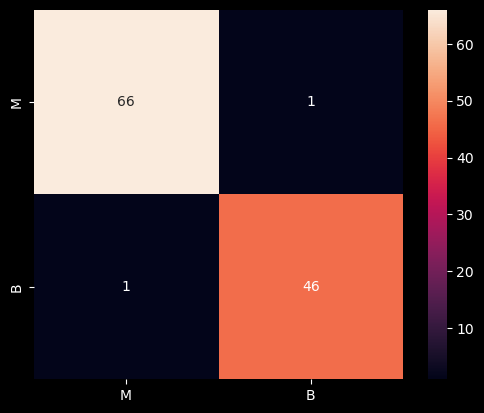

In [50]:
cm = confusion_matrix(y_test, y_pred7)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred7)
print("Model Accuracy =",acc*100,"%")

In [51]:
from sklearn.calibration import CalibratedClassifierCV

clf_list = [
    (LR,"LogisticRegression"),
    (classifier, "SVC"),
    (DTC, "DecisionTreeClassifier"),
    (RFC, "RandomForest"),
    (KNC,"KNeighborsClassifier"),
    (xgb_model,"XGBoost"),
    (CBC,"CatBoostClassifier")
]

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["s", "v", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(x_train, y_train)
    
    if name == "SVC":
        calibrated_clf = CalibratedClassifierCV(clf, method='sigmoid')
        calibrated_clf.fit(x_train, y_train)
        y_prob = calibrated_clf.predict_proba(x_test)[:, 1]
    else:
        y_prob = clf.predict_proba(x_test)[:, 1]
    
    display = CalibrationDisplay.from_predictions(
        y_test,
        y_prob,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

NameError: name 'classifier' is not defined

In [ ]:
plt.figure(figsize=(10,5))
data = [0.939,0.947,0.895,0.965,0.947,0.965,0.983]
names = ['Logistic Regression','SVM','Decision Tree Classifier','Random Forest Classifier','KNC','XGBoost','CatBoostClassifier']
colors = ['red','orange','green','blue','gray','brown','yellow']
plt.title ('Algorithms ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = colors,autopct = '%1.0f%%',)


In [52]:
########################### DO NOT RUN THIS CELL #################################################
# Check missing data
from sklearn.impute import SimpleImputer
#data.isnull().values.any()  # false indicates nothing
# handling missing data if the previous command return true
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_value = "NaN", strategy = "mean", axis=0) # axis=0 refers to column based
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x[:,1:3]) # this just example to explain how to identify the colunms of missing cells..
#..REMEMBER: the upper bound value not included (i.e: column 1 and 2 only)
x[:,1:3] = imp.transform(x[:,1:3])

# Data Normalization

In [53]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) #This is a default range
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.fit_transform(x_test)

# applying an algo (Logistic Regression) to make prediction After Normalization

In [54]:
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)
y_pred11 = LR.predict(X_test_sc)
print(y_pred11)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0]


Model Accuracy = 97.36842105263158 %


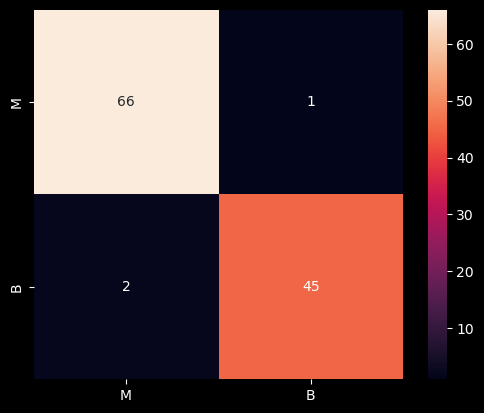

In [55]:
cm = confusion_matrix(y_test, y_pred11)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred11)
print("Model Accuracy =",acc*100,"%")

# applying an algo (DecisionTreeClassifier) to make prediction After Normalization

In [56]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_sc,y_train)
y_pred13 = DTC.predict(X_test_sc)
print(y_pred13)

[1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 1]


Model Accuracy = 73.68421052631578 %


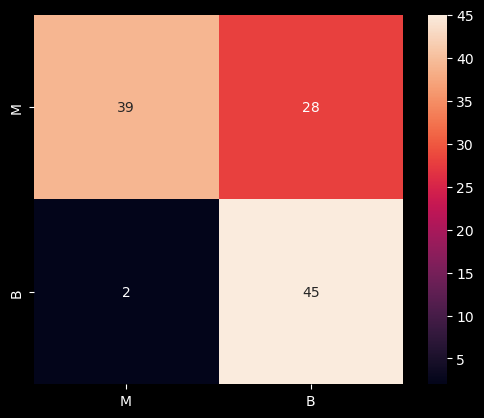

In [57]:
cm = confusion_matrix(y_test, y_pred13)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred13)
print("Model Accuracy =",acc*100,"%")

# # applying an algo (RandomForestClassifier) to make prediction After Normalization

In [58]:
# training
RFC = RandomForestClassifier()
RFC.fit(X_train_sc,y_train)
# testing
y_pred14 = RFC.predict(X_test_sc)
print(y_pred14)
# Model Evaluation

[1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1]


Model Accuracy = 78.0701754385965 %


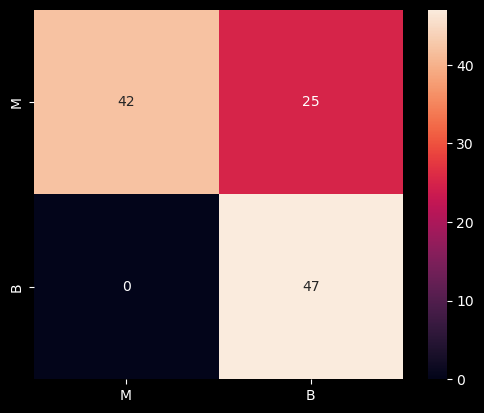

In [59]:
cm = confusion_matrix(y_test, y_pred14)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
acc = accuracy_score(y_test, y_pred14)
print("Model Accuracy =",acc*100,"%")

([<matplotlib.patches.Wedge at 0x2226d636620>,
 [Text(-0.9212808152346589, -0.6010338255710428, 'Accuracy'),
  Text(0.9212807589618072, 0.6010339118275746, 'Error')],
 [Text(-0.5025168083098138, -0.32783663212965963, '68%'),
  Text(0.5025167776155312, 0.327836679178677, '32%')])

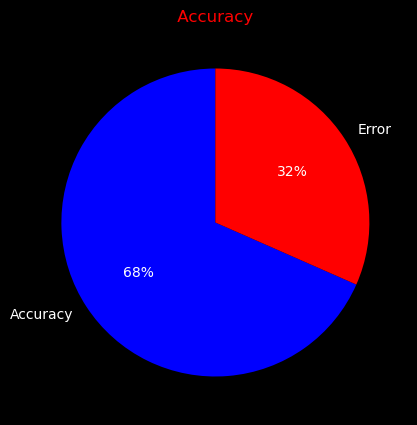

In [60]:
plt.figure(figsize=(10,5))
data = [0.684,0.316]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)


# KNeighborsClassifier

In [61]:
# training
KNC = KNeighborsClassifier()
KNC.fit(X_train_sc,y_train)
# testing
y_pred = KNC.predict(X_test_sc)
print(y_test)
print(y_pred)
# Model Evaluation
cm = confusion_matrix(y_test, y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


Model Accuracy = 85.08771929824562 %


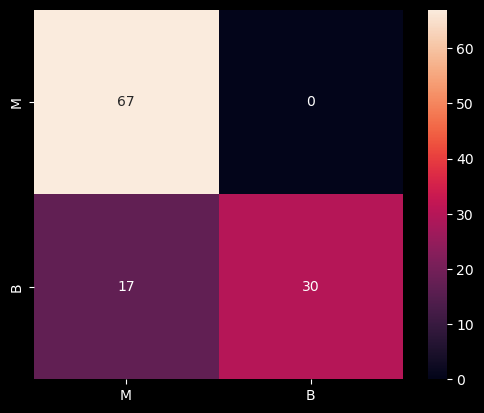

In [62]:
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy =",acc*100,"%")

([<matplotlib.patches.Wedge at 0x2226d73dae0>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Accuracy'),
  Text(0.49938938453783266, 0.980107260768394, 'Error')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85%'),
  Text(0.2723942097479087, 0.534603960419124, '15%')])

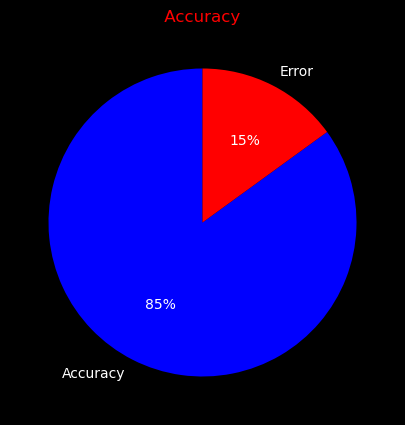

In [63]:
plt.figure(figsize=(10,5))
data = [0.85,0.15]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# applying an algo (SVM) to make prediction After Normalization

In [64]:
# training
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train_sc,y_train)
# testing
y_pred = classifier.predict(X_test_sc)
print(y_test)
print(y_pred)
# Model Evaluation
cm = confusion_matrix(y_test, y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0]


Model Accuracy = 95.6140350877193 %


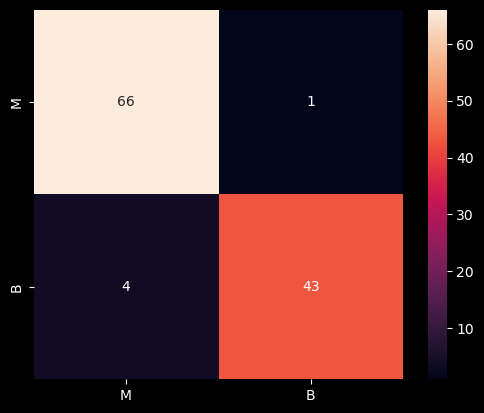

In [65]:
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy =",acc*100,"%")

([<matplotlib.patches.Wedge at 0x2226d81ba30>,
 [Text(-0.15156942094410547, -1.0895075541888954, 'Accuracy'),
  Text(0.15156952295116397, 1.0895075399979373, 'Error')],
 [Text(-0.08267422960587571, -0.5942768477393974, '96%'),
  Text(0.08267428524608943, 0.5942768399988748, '4%')])

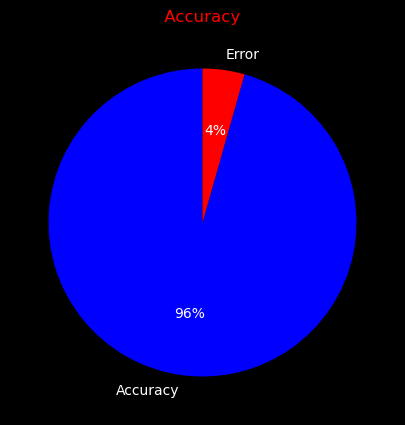

In [66]:
plt.figure(figsize=(10,5))
data = [0.956,0.044]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)


# XGBClassifier

In [67]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.01,max_depth=3,n_estimators=100,subsample=0.9,colsample_bytree=0.9)
xgb_model.fit(X_train_sc,y_train)
y_pred16 = xgb_model.predict(X_test_sc)
print(y_pred16)

[1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1]


Model Accuracy = 78.94736842105263 %


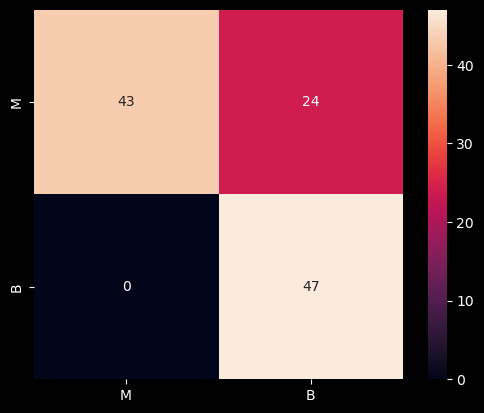

In [68]:
cm = confusion_matrix(y_test, y_pred16)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred16)
print("Model Accuracy =",acc*100,"%")

# CatBoostClassifier

In [69]:
CBC = CatBoostClassifier()
CBC.fit(X_train_sc,y_train)
y_pred17 = CBC.predict(X_test_sc)
print(y_pred17)

Learning rate set to 0.00736
0:	learn: 0.6826737	total: 8.41ms	remaining: 8.41s
1:	learn: 0.6730854	total: 13.6ms	remaining: 6.78s
2:	learn: 0.6639531	total: 19.1ms	remaining: 6.35s
3:	learn: 0.6545326	total: 24.6ms	remaining: 6.13s
4:	learn: 0.6465407	total: 31.5ms	remaining: 6.27s
5:	learn: 0.6377575	total: 36.7ms	remaining: 6.09s
6:	learn: 0.6284847	total: 40.9ms	remaining: 5.8s
7:	learn: 0.6189753	total: 45.7ms	remaining: 5.67s
8:	learn: 0.6097146	total: 50.2ms	remaining: 5.53s
9:	learn: 0.6028095	total: 56ms	remaining: 5.54s
10:	learn: 0.5968999	total: 61.5ms	remaining: 5.53s
11:	learn: 0.5901621	total: 66ms	remaining: 5.44s
12:	learn: 0.5842237	total: 70ms	remaining: 5.31s
13:	learn: 0.5774888	total: 74.7ms	remaining: 5.26s
14:	learn: 0.5695499	total: 78.9ms	remaining: 5.18s
15:	learn: 0.5609814	total: 83.4ms	remaining: 5.13s
16:	learn: 0.5546823	total: 87.8ms	remaining: 5.08s
17:	learn: 0.5487609	total: 91.7ms	remaining: 5s
18:	learn: 0.5428791	total: 95.9ms	remaining: 4.95s
19:

183:	learn: 0.1362771	total: 802ms	remaining: 3.55s
184:	learn: 0.1353249	total: 806ms	remaining: 3.55s
185:	learn: 0.1344403	total: 810ms	remaining: 3.55s
186:	learn: 0.1338755	total: 815ms	remaining: 3.54s
187:	learn: 0.1332705	total: 819ms	remaining: 3.54s
188:	learn: 0.1324605	total: 823ms	remaining: 3.53s
189:	learn: 0.1317811	total: 827ms	remaining: 3.53s
190:	learn: 0.1310228	total: 831ms	remaining: 3.52s
191:	learn: 0.1305096	total: 835ms	remaining: 3.51s
192:	learn: 0.1298978	total: 838ms	remaining: 3.5s
193:	learn: 0.1292172	total: 843ms	remaining: 3.5s
194:	learn: 0.1285331	total: 848ms	remaining: 3.5s
195:	learn: 0.1278104	total: 852ms	remaining: 3.49s
196:	learn: 0.1270128	total: 856ms	remaining: 3.49s
197:	learn: 0.1262911	total: 860ms	remaining: 3.48s
198:	learn: 0.1255616	total: 867ms	remaining: 3.49s
199:	learn: 0.1250246	total: 871ms	remaining: 3.48s
200:	learn: 0.1244916	total: 877ms	remaining: 3.48s
201:	learn: 0.1238511	total: 881ms	remaining: 3.48s
202:	learn: 0.1

370:	learn: 0.0657106	total: 1.6s	remaining: 2.71s
371:	learn: 0.0655478	total: 1.6s	remaining: 2.71s
372:	learn: 0.0653097	total: 1.61s	remaining: 2.7s
373:	learn: 0.0651713	total: 1.61s	remaining: 2.7s
374:	learn: 0.0649919	total: 1.62s	remaining: 2.7s
375:	learn: 0.0647944	total: 1.63s	remaining: 2.7s
376:	learn: 0.0646731	total: 1.63s	remaining: 2.7s
377:	learn: 0.0645459	total: 1.64s	remaining: 2.69s
378:	learn: 0.0643733	total: 1.64s	remaining: 2.69s
379:	learn: 0.0642451	total: 1.65s	remaining: 2.69s
380:	learn: 0.0641737	total: 1.65s	remaining: 2.68s
381:	learn: 0.0639632	total: 1.66s	remaining: 2.68s
382:	learn: 0.0637475	total: 1.66s	remaining: 2.68s
383:	learn: 0.0635191	total: 1.67s	remaining: 2.67s
384:	learn: 0.0633763	total: 1.67s	remaining: 2.67s
385:	learn: 0.0631743	total: 1.68s	remaining: 2.67s
386:	learn: 0.0629608	total: 1.68s	remaining: 2.67s
387:	learn: 0.0627424	total: 1.69s	remaining: 2.66s
388:	learn: 0.0624972	total: 1.69s	remaining: 2.66s
389:	learn: 0.06234

555:	learn: 0.0402577	total: 2.41s	remaining: 1.92s
556:	learn: 0.0401580	total: 2.41s	remaining: 1.92s
557:	learn: 0.0400993	total: 2.42s	remaining: 1.91s
558:	learn: 0.0399834	total: 2.42s	remaining: 1.91s
559:	learn: 0.0399296	total: 2.43s	remaining: 1.91s
560:	learn: 0.0398087	total: 2.43s	remaining: 1.9s
561:	learn: 0.0397094	total: 2.43s	remaining: 1.9s
562:	learn: 0.0396341	total: 2.44s	remaining: 1.89s
563:	learn: 0.0395279	total: 2.44s	remaining: 1.89s
564:	learn: 0.0394388	total: 2.45s	remaining: 1.88s
565:	learn: 0.0393511	total: 2.45s	remaining: 1.88s
566:	learn: 0.0392475	total: 2.45s	remaining: 1.87s
567:	learn: 0.0391434	total: 2.46s	remaining: 1.87s
568:	learn: 0.0390634	total: 2.46s	remaining: 1.86s
569:	learn: 0.0389435	total: 2.46s	remaining: 1.86s
570:	learn: 0.0388444	total: 2.47s	remaining: 1.85s
571:	learn: 0.0387717	total: 2.47s	remaining: 1.85s
572:	learn: 0.0387135	total: 2.48s	remaining: 1.84s
573:	learn: 0.0385688	total: 2.48s	remaining: 1.84s
574:	learn: 0.

745:	learn: 0.0262361	total: 3.21s	remaining: 1.09s
746:	learn: 0.0261621	total: 3.22s	remaining: 1.09s
747:	learn: 0.0261033	total: 3.22s	remaining: 1.08s
748:	learn: 0.0260209	total: 3.23s	remaining: 1.08s
749:	learn: 0.0259710	total: 3.23s	remaining: 1.08s
750:	learn: 0.0259120	total: 3.23s	remaining: 1.07s
751:	learn: 0.0258523	total: 3.24s	remaining: 1.07s
752:	learn: 0.0257951	total: 3.24s	remaining: 1.06s
753:	learn: 0.0257485	total: 3.25s	remaining: 1.06s
754:	learn: 0.0256757	total: 3.25s	remaining: 1.05s
755:	learn: 0.0256190	total: 3.25s	remaining: 1.05s
756:	learn: 0.0255984	total: 3.26s	remaining: 1.05s
757:	learn: 0.0255414	total: 3.26s	remaining: 1.04s
758:	learn: 0.0254751	total: 3.27s	remaining: 1.04s
759:	learn: 0.0254153	total: 3.27s	remaining: 1.03s
760:	learn: 0.0253628	total: 3.28s	remaining: 1.03s
761:	learn: 0.0253251	total: 3.28s	remaining: 1.02s
762:	learn: 0.0252641	total: 3.29s	remaining: 1.02s
763:	learn: 0.0251890	total: 3.29s	remaining: 1.02s
764:	learn: 

938:	learn: 0.0175003	total: 4.03s	remaining: 262ms
939:	learn: 0.0174651	total: 4.03s	remaining: 258ms
940:	learn: 0.0174560	total: 4.04s	remaining: 253ms
941:	learn: 0.0174208	total: 4.04s	remaining: 249ms
942:	learn: 0.0173882	total: 4.05s	remaining: 245ms
943:	learn: 0.0173509	total: 4.05s	remaining: 240ms
944:	learn: 0.0173129	total: 4.06s	remaining: 236ms
945:	learn: 0.0172664	total: 4.06s	remaining: 232ms
946:	learn: 0.0172398	total: 4.07s	remaining: 228ms
947:	learn: 0.0171789	total: 4.07s	remaining: 223ms
948:	learn: 0.0171292	total: 4.08s	remaining: 219ms
949:	learn: 0.0170923	total: 4.08s	remaining: 215ms
950:	learn: 0.0170679	total: 4.08s	remaining: 210ms
951:	learn: 0.0170308	total: 4.09s	remaining: 206ms
952:	learn: 0.0170072	total: 4.09s	remaining: 202ms
953:	learn: 0.0169673	total: 4.1s	remaining: 198ms
954:	learn: 0.0169250	total: 4.1s	remaining: 193ms
955:	learn: 0.0168972	total: 4.11s	remaining: 189ms
956:	learn: 0.0168450	total: 4.11s	remaining: 185ms
957:	learn: 0.

Model Accuracy = 78.94736842105263 %


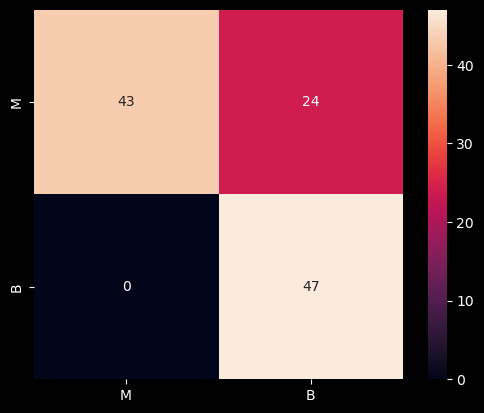

In [70]:
cm = confusion_matrix(y_test, y_pred17)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred17)
print("Model Accuracy =",acc*100,"%")

In [71]:
pickle.dump(CBC, open('Cancer Detection.pkl', 'wb'))

In [72]:
pickled_model = pickle.load(open('Cancer Detection.pkl', 'rb'))

In [73]:
pickled_model.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [74]:
test = pd.read_csv('test.csv')

In [75]:
output = pickled_model.predict(test)
output = int(output)
print(output)

1


In [76]:
converter = pyttsx3.init()
# Set properties before adding
# Things to say
# Sets speed percent
# Can be more than 100
converter.setProperty('rate', 120)
# Set volume 0-1
converter.setProperty('volume', 1)
# Queue the entered text
# There will be a pause between
# each one like a pause in
# a sentence
if output == 0 :
    converter.say("Hello Mahmoud Ragab, I am Dr.Emo and I am here to help you. We are very happy to receive this news. We disclosed this data and it turned out to be the data of an uninfected person. Congratulations")
elif output == 1 :
    converter.say("Hello Mahmoud Ragab, I am Dr. Emo and I am here to help you. I am very sorry to tell you this sad news. We have disclosed this data and it turns out that he has a cancerous tumor. You should go to the doctor as soon as possible.")
# Empties the say() queue
# Program will not continue
# until all speech is done talking
converter.runAndWait()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_4944\3706955895.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Dark2")
C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\calibra

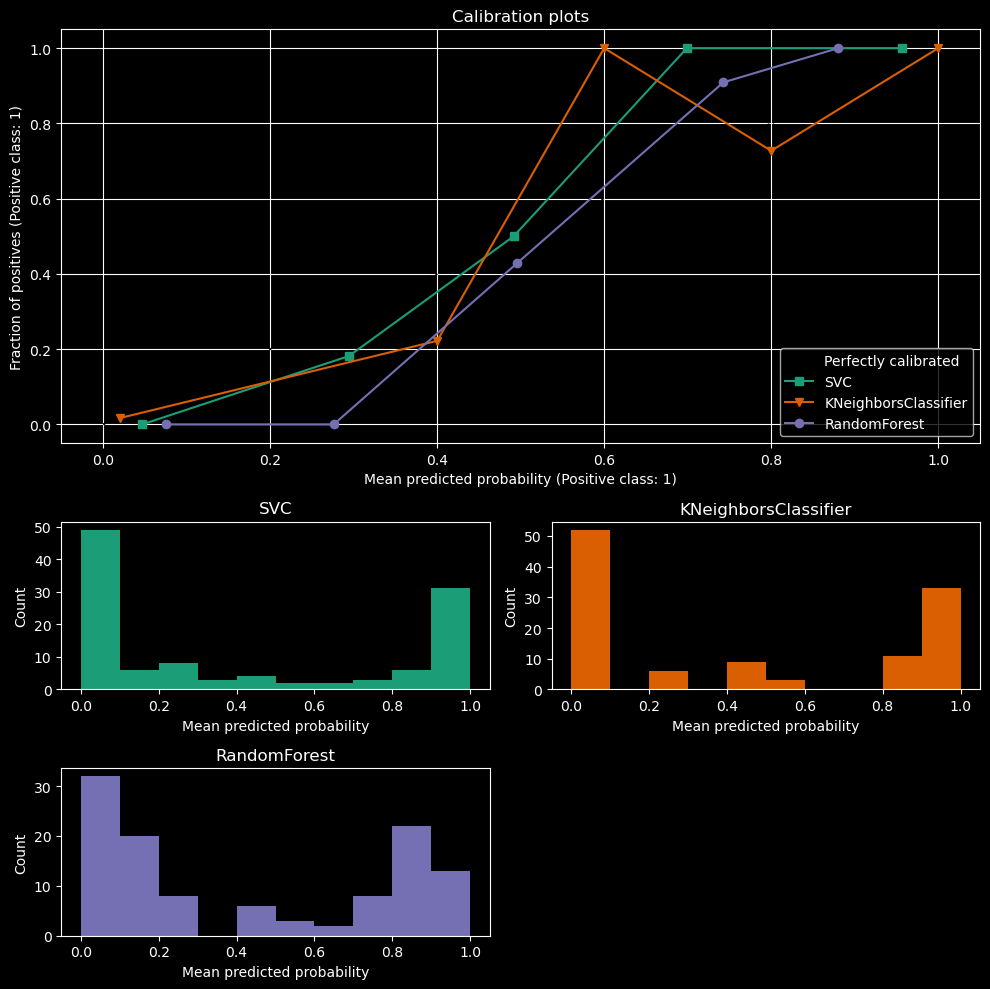

In [88]:
from sklearn.calibration import CalibratedClassifierCV

clf_list = [
    (LR,"LogisticRegression"),
    (classifier, "SVC"),
    (DTC, "DecisionTreeClassifier"),
    (RFC, "RandomForest"),
    (KNC,"KNeighborsClassifier"),
    (CBC,"CatBoostClassifier")
]

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["s", "v", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(x_train, y_train)
    
    if name == "SVC":
        calibrated_clf = CalibratedClassifierCV(clf, method='sigmoid')
        calibrated_clf.fit(x_train, y_train)
        y_prob = calibrated_clf.predict_proba(x_test)[:, 1]
    else:
        y_prob = clf.predict_proba(x_test)[:, 1]
    
    display = CalibrationDisplay.from_predictions(
        y_test,
        y_prob,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()